Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")

Data Understanding & Initial Exploration:

In [2]:
# Loading the dataset
data = pd.read_excel("PSP_Jan_Feb_2019.xlsx")

In [3]:
print("Shape of the dataset:")
print(data.shape)

Shape of the dataset:
(50410, 8)


In [4]:
print("First 10 Row of dataset")
data.head(10)


First 10 Row of dataset


,Unnamed: 0,tmsp,country,amount,success,PSP,3D_secured,card
0,0,2019-01-01 00:01:11,Germany,89,0,UK_Card,0,Visa
1,1,2019-01-01 00:01:17,Germany,89,1,UK_Card,0,Visa
2,2,2019-01-01 00:02:49,Germany,238,0,UK_Card,1,Diners
3,3,2019-01-01 00:03:13,Germany,238,1,UK_Card,1,Diners
4,4,2019-01-01 00:04:33,Austria,124,0,Simplecard,0,Diners
5,5,2019-01-01 00:06:41,Switzerland,282,0,UK_Card,0,Master
6,6,2019-01-01 00:07:19,Switzerland,282,0,Simplecard,0,Master
7,7,2019-01-01 00:08:46,Germany,117,1,UK_Card,0,Master
8,8,2019-01-01 00:09:56,Switzerland,174,0,Simplecard,0,Visa
9,9,2019-01-01 00:10:49,Switzerland,174,0,Simplecard,0,Visa


In [5]:
print("Info about of dataset:")
print(data.info())


Info about of dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50410 entries, 0 to 50409
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Unnamed: 0  50410 non-null  int64         
 1   tmsp        50410 non-null  datetime64[ns]
 2   country     50410 non-null  object        
 3   amount      50410 non-null  int64         
 4   success     50410 non-null  int64         
 5   PSP         50410 non-null  object        
 6   3D_secured  50410 non-null  int64         
 7   card        50410 non-null  object        
dtypes: datetime64[ns](1), int64(4), object(3)
memory usage: 3.1+ MB
None


In [6]:
print("Basic statistics for numerical columns:")
numerical_stats = data[["amount", "success", "3D_secured"]].describe()
print(numerical_stats)


Basic statistics for numerical columns:
             amount       success    3D_secured
count  50410.000000  50410.000000  50410.000000
mean     202.395715      0.202896      0.238266
std       96.274730      0.402160      0.426027
min        6.000000      0.000000      0.000000
25%      133.000000      0.000000      0.000000
50%      201.000000      0.000000      0.000000
75%      269.000000      0.000000      0.000000
max      630.000000      1.000000      1.000000


In [7]:
print("Basic statistics for categorical columns:")
categorical_stats = data[["country", "PSP", "card"]].describe(include="object")
print(categorical_stats)


Basic statistics for categorical columns:
        country      PSP    card
count     50410    50410   50410
unique        3        4       3
top     Germany  UK_Card  Master
freq      30233    26459   29002


Data Cleaning & Pre-processing:

In [8]:
data.drop(columns=["Unnamed: 0"], inplace=True)
print("Dropped the unnecessary first column of the dataset")

Dropped the unnecessary first column of the dataset


In [9]:
print("Processed Data (First 5 Rows)")
data.head(5)


Processed Data (First 5 Rows)


,tmsp,country,amount,success,PSP,3D_secured,card
0,2019-01-01 00:01:11,Germany,89,0,UK_Card,0,Visa
1,2019-01-01 00:01:17,Germany,89,1,UK_Card,0,Visa
2,2019-01-01 00:02:49,Germany,238,0,UK_Card,1,Diners
3,2019-01-01 00:03:13,Germany,238,1,UK_Card,1,Diners
4,2019-01-01 00:04:33,Austria,124,0,Simplecard,0,Diners


In [10]:
missing_values_check = data.isnull().sum()
print("Missing Values Check:\n", missing_values_check)


Missing Values Check:
 tmsp          0
country       0
amount        0
success       0
PSP           0
3D_secured    0
card          0
dtype: int64



Percentage of Transactions Considered Outliers: 0.30351120809363225 %


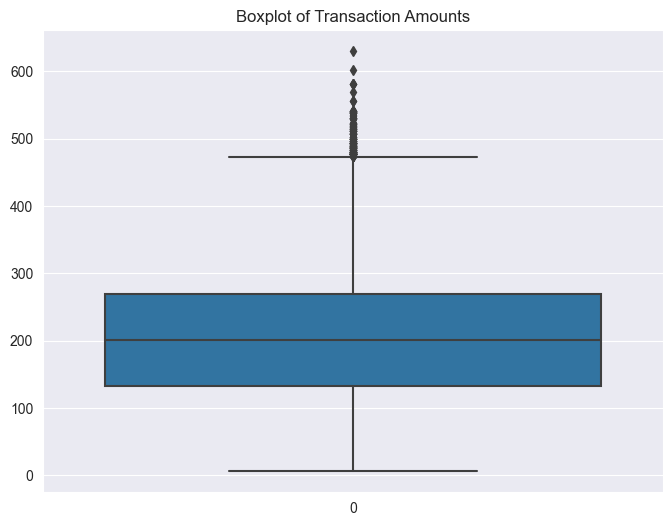

In [11]:
# Address Potential Outliers
# Checking for outliers in the 'amount' column using the IQR method
Q1 = data["amount"].quantile(0.25)
Q3 = data["amount"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifying outliers
outliers = data[(data["amount"] < lower_bound) | (data["amount"] > upper_bound)]
percentage_outliers = len(outliers) / len(data) * 100

print("\nPercentage of Transactions Considered Outliers:", percentage_outliers, "%")

# Identifying potential anomalies for 'amount' column
plt.figure(figsize=(8, 6))
sns.boxplot(data["amount"])
plt.title("Boxplot of Transaction Amounts")
plt.show()

Pre-Feature Engineering EDA:

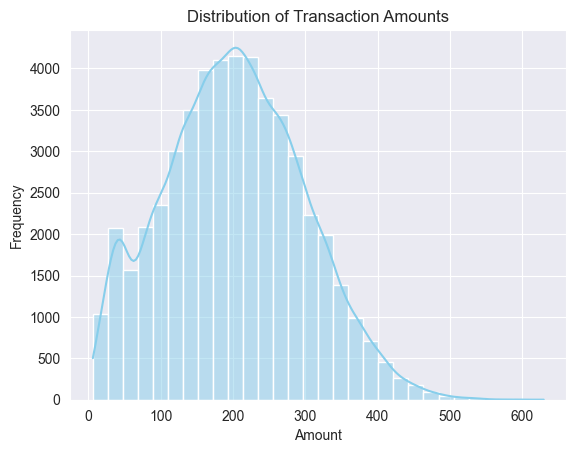

In [12]:
sns.histplot(data["amount"], kde=True, bins=30, color="skyblue")
plt.title("Distribution of Transaction Amounts")
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.show()


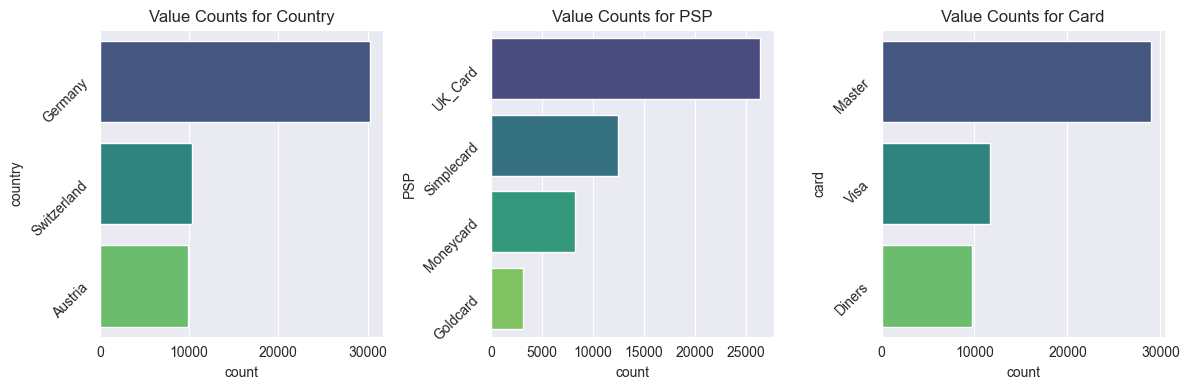

In [18]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

# Plotting the 'country' bar chart on the first subplot
sns.countplot(
    data=data,
    y="country",
    order=data["country"].value_counts().index,
    ax=axes[0],
    palette="viridis",
)
axes[0].set_title("Value Counts for Country")
axes[0].tick_params(axis="y", rotation=45)

# Plotting the 'PSP' bar chart on the second subplot
sns.countplot(
    data=data,
    y="PSP",
    order=data["PSP"].value_counts().index,
    ax=axes[1],
    palette="viridis",
)
axes[1].set_title("Value Counts for PSP")
axes[1].tick_params(axis="y", rotation=45)

# Plotting the 'card' bar chart on the third subplot
sns.countplot(
    data=data,
    y="card",
    order=data["card"].value_counts().index,
    ax=axes[2],
    palette="viridis",
)
axes[2].set_title("Value Counts for Card")
axes[2].tick_params(axis="y", rotation=45)

plt.tight_layout()
plt.show()

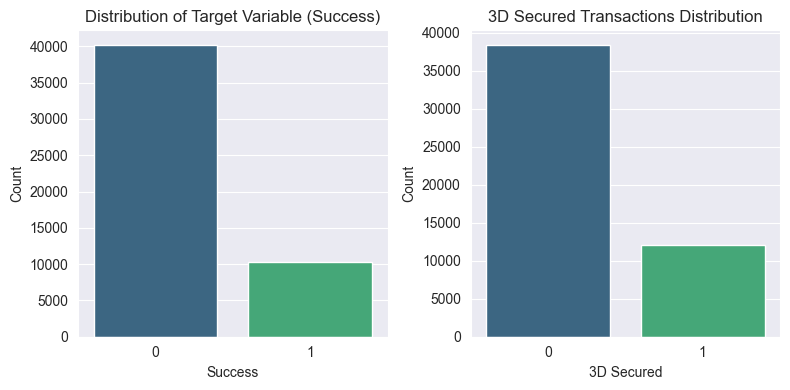

In [19]:
plt.figure(figsize=(8, 4))

# Distribution of Target Variable (Success)
plt.subplot(1, 2, 1)
sns.countplot(x=data["success"], palette="viridis")
plt.title("Distribution of Target Variable (Success)")
plt.xlabel("Success")
plt.ylabel("Count")

# 3D Secured Transactions Distribution
plt.subplot(1, 2, 2)
sns.countplot(x=data["3D_secured"], palette="viridis")
plt.title("3D Secured Transactions Distribution")
plt.xlabel("3D Secured")
plt.ylabel("Count")

plt.tight_layout()
plt.show()

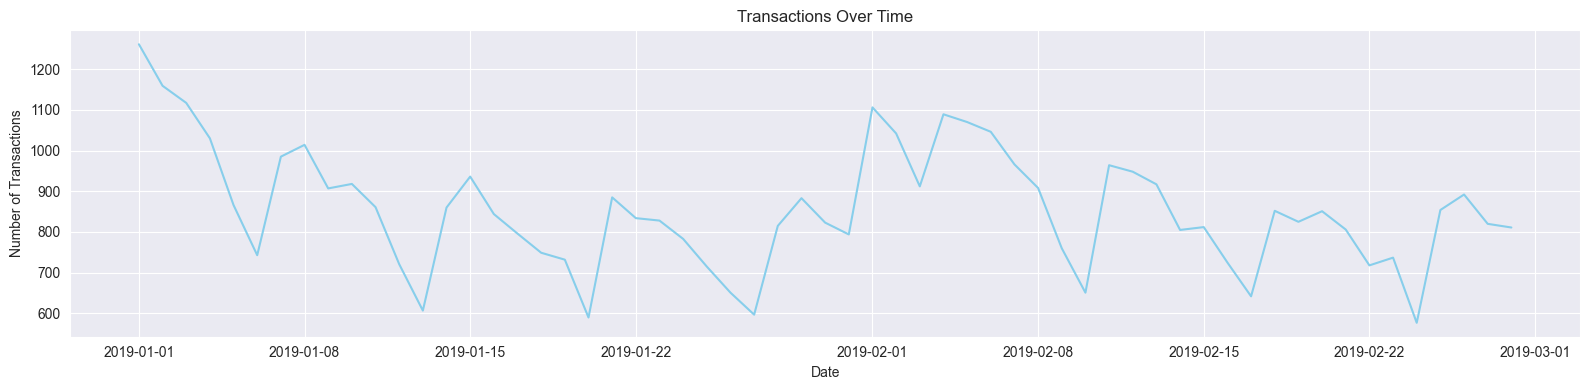

In [21]:
data["tmsp"] = pd.to_datetime(data["tmsp"])

# Group by date and count the number of transactions for each day
daily_transactions = data.groupby(data["tmsp"].dt.date).size()

# Plotting transactions over time
plt.figure(figsize=(16, 4))
daily_transactions.plot(color="skyblue")
plt.title("Transactions Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Transactions")
plt.grid(True)
plt.tight_layout()
plt.show()

Feature Engineering:

Advance EDA: